In [3]:
import numpy
from matplotlib import pyplot
import ipywidgets

%matplotlib inline

In [4]:
pyplot.rc('font', family='serif',size=16)

In [5]:
def rho_red_light(x,rho_max):
    rho = numpy.full_like(x, rho_max)
     # rho = rho_max * numpy.ones_like(x)
    mask = numpy.where(x < 3)
    rho[mask] /= 2
    # rho[mask] = rho_max / 2
    return rho

In [6]:
#Set parameters.
nx = 81
L = 4.0
dx = L / (nx - 1)
x = numpy.linspace(0.0, L, num = nx)


rho_max = 10.0
u_max = 1.0


rho0 = rho_red_light(x, rho_max)

In [7]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.grid()
    pyplot.title('Time step:{}'.format(n))
    pyplot.xlabel('Road[km]')
    pyplot.ylabel('Traffic density [cars/hr]')
    pyplot.plot(x, rho_hist[n])
    pyplot.xlim(x[0],x[-1])
    pyplot.ylim(4.0, 11.0)
    pyplot.show(0)

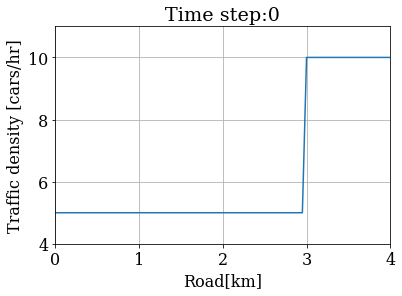

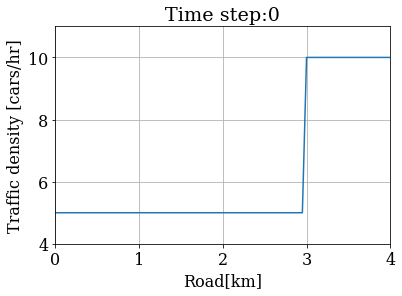

In [8]:
plot(0, x, [rho0])

In [9]:
def traffic_speed(rho, u_max, rho_max):
    return u_max * (1- rho / rho_max)

def traffic_flux(rho, u_max, rho_max):
    return rho * traffic_speed(rho, u_max, rho_max)

In [10]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,description='Time step')
    w = ipywidgets.interactive(rho_hist, n=nt_slider, u_hist=ipywidgets.fixed(u_hist), x=ipywidgets.fixed(x))
    return w

In [11]:
interactive_plot(x, [rho0])

NameError: name 'u_hist' is not defined

def lax_friderichs(rho0, nt, dt, dx, u_max, rho_max):
    #Need to create/initialize'rho_hist'
    #Need to compute solution at each time step
    #Need about boundary conditions
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = traffic_flux(rho, u_max, rho_max)
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) -
                     dt / (2.0 * dx) * (F[2:] - F[:-2]))
        rho[0] = (0.5 * (rho[-1] + rho[1]) - dt / (2.0 * dx) * (F[1] - F[-1]))
        rho[-1] = (0.5 * (rho[-2] + rho[0]) - dx / (2.0 * dx) * (F[0] - F[-2]))
        rho_hist.append(rho.copy())
    return rho_hist

In [12]:
def lax_friderichs(rho0, nt, dt, dx, u_max, rho_max):
    #Need to create/initialize'rho_hist'
    rho_hist = [rho0.copy()]
    nx = len(rho0)
    pring(nx)
    # Or nx = rho0.size
    #Need to compute solution at each time step
    rho = rho0.copy()
    for n in range(nt):
        rhon = rho.copy()  #可以不用这个，后面直接写：rho[i] = 0.5 * (rho[i - 1] + rho[i + 1]) - dt * (F[i+1] - F[i-1]) / (2 * dx)
        F = traffic_flux(rho, u_max, rho_max)
        for i in range(1,nx - 1):     #边界单独写大小，所以从1 到nx-1
            rho[i] = 0.5 * (rhon[i - 1] + rhon[i + 1]) - dt * (F[i+1] - F[i-1]) / (2 * dx)
            #rho[1:-1] = 0.5 * (rhon[:-2] + rhon[2:]) - dt / (2.0 * dx) * (F[2:] - F[:-2])
            rho_hist.append(rho.copy())
    #Need about boundary conditions
    return rho_hist
            

In [13]:
nt = 40
sigma = 1.0
dt = sigma * dx / u_max


rho_hist = lax_friderichs(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x,rho_hist)

NameError: name 'pring' is not defined

In [29]:
sigma = 0.5
dt = sigma * dx/ u_max
nt = 80


rho_hist = lax_friderichs(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='Time step', max=6320), Output()), _dom_classes=('widget-…

In [34]:
def traffic_jacobian(rho, u_max, rho_max):
    J = u_max * (1.0 - 2.0 * rho / rho_max)
    return J


def lax_wendroff(rho0, nt, dt, dx, u_max, rho_max):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = traffic_flux(rho, u_max, rho_max)
        J = traffic_jacobian(rho, u_max, rho_max)
        rho[1:-1] = (rho[1:-1] - dt / (2.0 * dx) * (F[2:] - F[:-2]) + dt**2 / (4.0 * dx**2) * ((J[1:-1] + J[2:]) * (F[2:] - F[1:-1]) -
                    (J[:-2] + J[1:-1]) * (F[1:-1] - F[:-2])))
        rho_hist.append(rho.copy())
    return rho_hist

In [35]:
sigma = 1.0
dt = sigma * dt/ u_max
nt = 40
rho_hist = lax_wendroff(rho0, nt, dt, dx, u_max, rho_max)
interactive_plot(x,rho_hist)

NameError: name 'u_hist' is not defined

In [ ]:
sigma = 0.5
